<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [3]:
import json 
# Define the file path for the JSON file
json_file_path1 = 'problem_1/dataset_1.json'
json_file_path2 = 'problem_1/dataset_2.json'
json_file_path3 = 'problem_1/dataset_3.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path1, 'r') as json_file:
    data1 = json.load(json_file)
with open(json_file_path2, 'r') as json_file:
    data2 = json.load(json_file)
with open(json_file_path3, 'r') as json_file:
    data3 = json.load(json_file)

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. = \frac{N!}{M!(N-M)!} p^{M} (1-p)^{N-M} $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



The expecataion value for posterior distribution 1 is: 0.392
The variance for posterior distribution 1 is: 0.238336
The expecataion value for posterior distribution 2 is: 0.406
The variance for posterior distribution 2 is: 0.24116400000000002
The expecataion value for posterior distribution 3 is: 0.284
The variance for posterior distribution 3 is: 0.20334399999999997


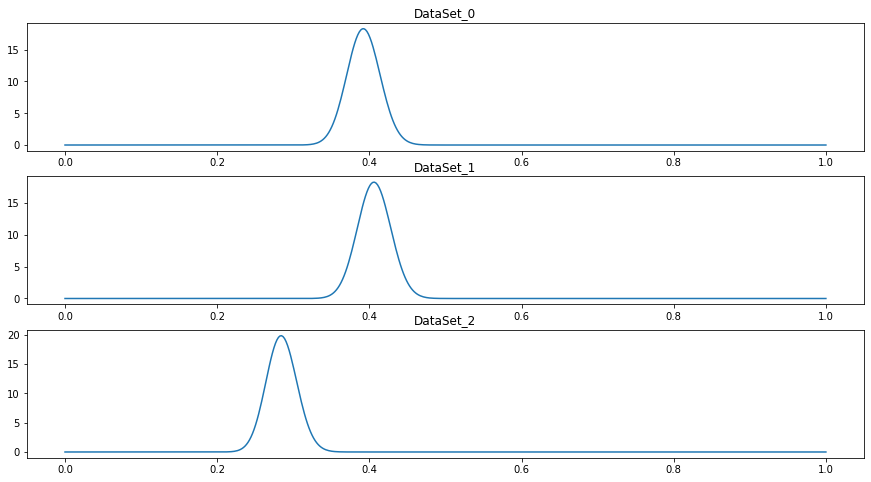

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

'''--------------------Write your code below this line------------------------------'''
posterior_1 = []
posterior_2 = []
posterior_3 = []

exp_1 = np.mean(data1)
exp_2 = np.mean(data2)
exp_3 = np.mean(data3)

N = 500
p_values = np.linspace(0, 1, N)

fig, axs = plt.subplots(3, 1, figsize=(15, 8))

data_set = [data1, data2, data3]

count = 0

for data in data_set:
    likelihood = []
    
    for p in p_values:
        like = p**(sum(data)) * (1-p) **(len(data)-sum(data))
        likelihood.append(like)
        
    posterior = np.array(likelihood) / np.sum(likelihood)

    Area = np.trapz(posterior, p_values)
    normalized_post = posterior / Area
    if data == data1:
        posterior_1 = normalized_post
        var_1 = exp_1 * (1 - exp_1)
        axs[count].plot(p_values, normalized_post )
        axs[count].set_title(f'DataSet_{count}')
        print(f'The expecataion value for posterior distribution 1 is: {exp_1}')
        print(f'The variance for posterior distribution 1 is: {var_1}')      
    elif data == data2:
        posterior_2 = normalized_post
        var_2 = exp_2 * (1 - exp_2)
        axs[count].plot(p_values, normalized_post )
        axs[count].set_title(f'DataSet_{count}')
        print(f'The expecataion value for posterior distribution 2 is: {exp_2}')
        print(f'The variance for posterior distribution 2 is: {var_2}') 
    elif data == data3:
        axs[count].plot(p_values, normalized_post )
        axs[count].set_title(f'DataSet_{count}')
        var_3 = exp_3 * (1 - exp_3)
        print(f'The expecataion value for posterior distribution 3 is: {exp_3}')
        print(f'The variance for posterior distribution 3 is: {var_3}') 
    count += 1






<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\frac{N!}{M!(N-M)!}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>



## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

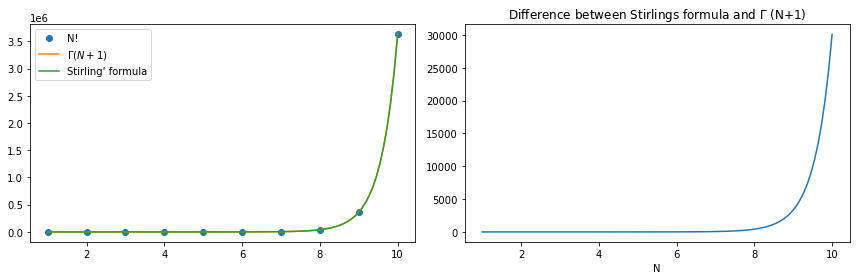

196
203
142
500


In [51]:

'''--------------------Write your code below this line------------------------------'''
from scipy.special import gamma  
def log (n):
    result = []
    for i in range(0, len(n)):
        num = math.log(math.factorial(n[i]))
        result.append(num)
    print(result)
    return result

def Stirling_approx (n):
    result = []
    for i in range(len(n)):
        num = math.sqrt(2 * math.pi * n[i]) * (n[i] / math.e) ** (n[i])
        result.append(num)
    return result

x = np.arange(1, 11)
x_smooth = np.linspace(1, 10, 100)
y = np.zeros(10)
g = [gamma(N + 1) for N in x_smooth]

for i in range(10):
    y[i] = math.factorial(x[i])
    
plt.figure(figsize=(12, 4))
plt.yscale('linear')


plt.subplot(1, 2, 1)
plt.plot(x, y, linestyle='', marker = 'o', label = 'N!')
plt.plot(x_smooth, g, label = r'$\Gamma (N+1)$')
plt.plot(x_smooth, Stirling_approx(x_smooth), label = 'Stirling\' formula' )
plt.legend()

difference = np.array(g) - np.array(Stirling_approx(x_smooth))
plt.subplot(1, 2, 2)
plt.plot(x_smooth, difference)
plt.title(r'Difference between Stirlings formula and $\Gamma$ (N+1)')
plt.xlabel('N')

plt.yscale("linear")
plt.tight_layout()
plt.show()

print(np.sum(data1))
print(np.sum(data2))
print(np.sum(data3))
print(len(data1))



<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** $\frac{N!}{M!(N-M)!}\frac{\partial}{\partial p}\left(p^M (1-p)^{N-M}\right) = \frac{(1 - p)^{N - M}p^{M - 1} \cdot (Np - M)}{p-1}\rightarrow N(1-p)^{N-M}p^M = M(1-p)^{N-M}p^{M-1}$ <br>
<br>
<br> Then drop the binomial term since it constant, the answer is now $500p^{M}(1-p)^{500-M} = Mp^{M-1}(1-p)^{500-M}$<br>
'' **write you answer above**''
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''
<br>**Data set 1:** 0.392 and 0.998 <br> **Data set 2:** 0.406 and 0.998<br>**Data set 3:** 0.284 and 0.998
<br>
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

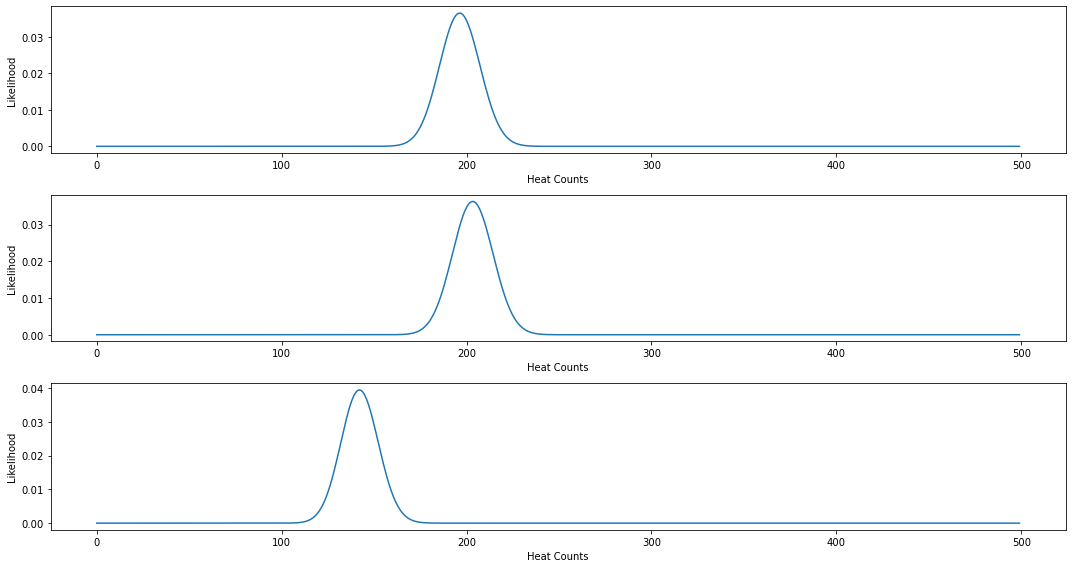

In [12]:
from scipy.stats import binom
from scipy.optimize import minimize

N = 500
bias_values = np.linspace(0, 1, N)
fig, axs = plt.subplots(3, 1, figsize=(15, 8))

for data in data_set:
    mle_array = [] 
    likelihood = binom.pmf(np.sum(data), N, bias_values)
    number_heads_array = np.arange(N)
    
    mle_estimate = bias_values[np.argmax(likelihood)]
    mle_array.append(mle_estimate)
    
    max_likelihood_fuc = binom.pmf(number_heads_array, N, mle_estimate)
    if data == data1:
        axs[0].plot(number_heads_array, max_likelihood_fuc)
        axs[0].set_xlabel('Heat Counts')
        axs[0].set_ylabel("Likelihood")
        
    if data == data2:
        axs[1].plot(number_heads_array, max_likelihood_fuc)
        axs[1].set_xlabel('Heat Counts')
        axs[1].set_ylabel("Likelihood")
        
    if data == data3:
        axs[2].plot(number_heads_array, max_likelihood_fuc)
        axs[2].set_xlabel('Heat Counts')
        axs[2].set_ylabel("Likelihood")
    
    

plt.tight_layout()
plt.show()




<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

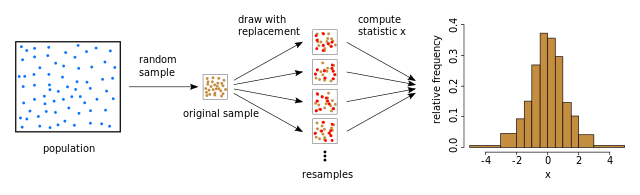
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



The mean expectation value:[0.39165999999999995, 0.406885, 0.2853175]
The mean variance value is: [0.21934680186055633, 0.2197049514338427, 0.21903514941339614]


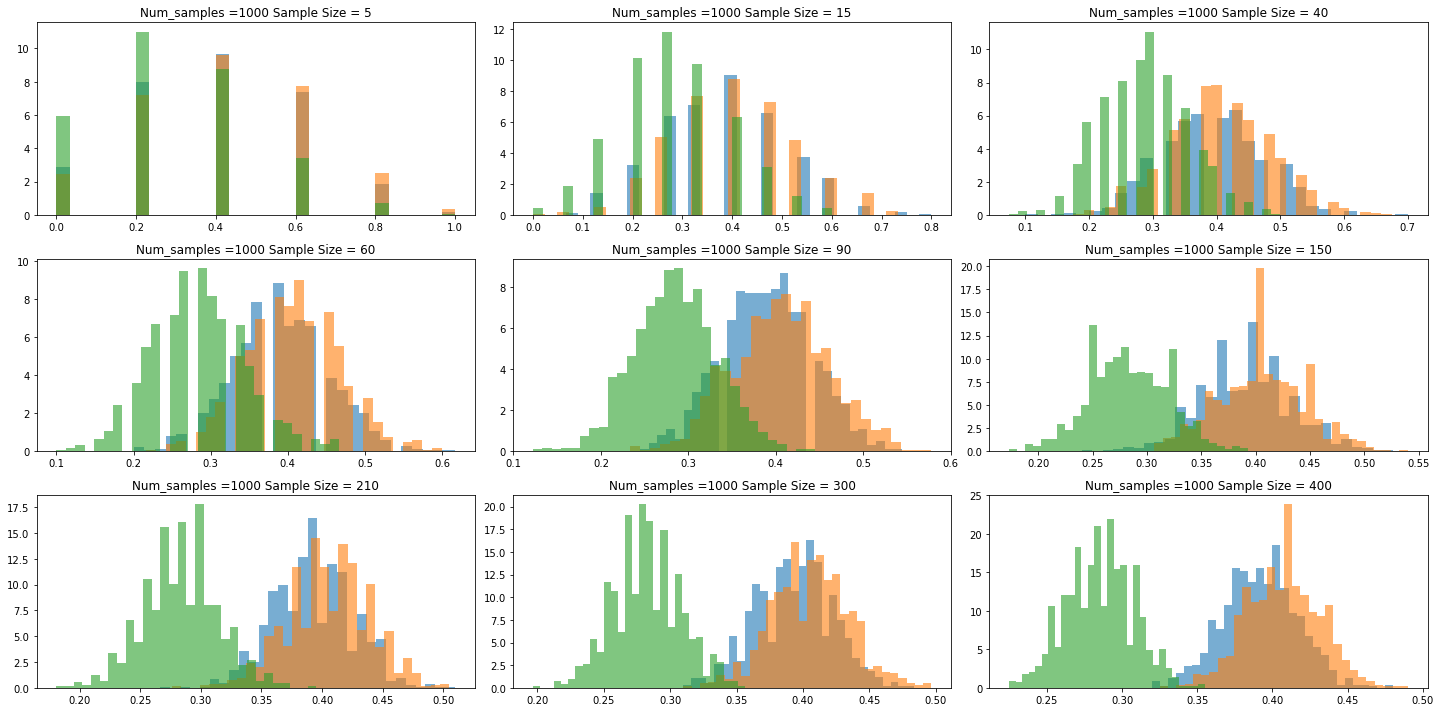

In [57]:
'''--------------------Write your code below this line------------------------------'''
from scipy.stats import norm

N = 1000
sample_size = [5, 15, 40, 60, 90, 150, 210, 300, 400]
nj = 3
ni = 3
fig, axs = plt.subplots(ni, nj, figsize=(20, 10))
n = 20
mean_exp_value = []
mean_var = []
for data in data_set:
    for j, sample in enumerate(sample_size):
    
        sample_means = []
        for i in range(N):
            bootstrap_sample = np.random.choice(data, size = sample, replace = True)
            sample_mean = np.mean(bootstrap_sample)
            var.append(np.var(bootstrap_sample))
            sample_means.append(sample_mean)
        mu, std = norm.fit(sample_means)
        
        n, bins, i = axs[j // nj, j % nj].hist(sample_means, bins = 30, density=True, alpha =0.6)
        axs[j // nj, j % nj].set_title(f'Num_samples ={N} Sample Size = {sample}')
        counts += 1 
        mean_exp_value.append(np.mean(sample_means))
        mean_var.append(np.mean(var))

exp_value = [mean_exp_value[8], mean_exp_value[17], mean_exp_value[26]]
var = [mean_var[8], mean_var[17], mean_var[26]]
print(f"The mean expectation value:{exp_value}" )
print(f"The mean variance value is: {var}")
plt.tight_layout()
plt.show()


## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

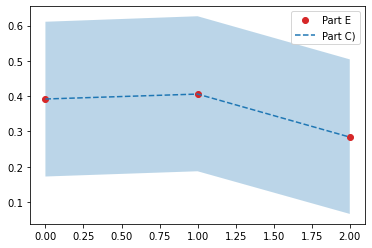

Although they look very similar, there are still a small difference between that is caused by the approximation made by the calculator.


In [72]:
upper_bound = []
lower_bound = []
for i in range(3):
    upper = np.array(exp_value[i]) + np.array(var[i])
    lower = np.array(exp_value[i]) - np.array(var[i])
    upper_bound.append(upper)
    lower_bound.append(lower) 
x = np.arange(3)
y = [.392, .406, .284]
plt.plot(x, exp_value, linestyle = '', marker = 'o', color = 'tab:red', label="Part E")
plt.fill_between(x, lower_bound, upper_bound,alpha=0.3, linestyle='--')
plt.plot(x, y, label ="Part C)", linestyle = '--')
plt.legend()
plt.show()
print("Although they look very similar, there are still a small difference between that is caused by the approximation made by the calculator.")

<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [98]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''

class Particle:
    def __init__(self, name, label, decay_constant ):
        self.name = name
        self.label = label
        self.decay_constant = decay_constant

    def pdf_decay(self, time):
        return self.decay_constant * np.exp(-self.decay_constant * time)
    
    def pdf_decay_x(self, x):
        Z = np.exp(-1/self.decay_constant)
        return (1 / Z) * (1 / self.decay_constant) * np.exp(-x / self.decay_constant) * self.pdf_decay(time)

    

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

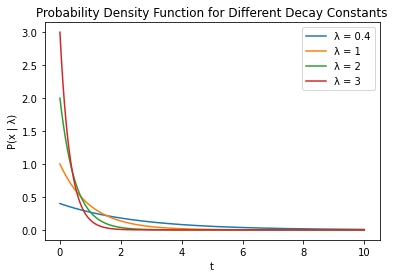

In [96]:
position = np.linspace(0, 10, 1000)

decay_con = [0.4, 1, 2, 3]

for decay_constant in decay_con:
    particle = Particle("Particle 1", 1, decay_constant)
    pdf_values = [particle.pdf_decay(x) for x in position]
    plt.plot(position, pdf_values, label = f'λ = {decay_constant}')
    
plt.xlabel('t')
plt.ylabel('P(t | λ)')
plt.title('Probability Density Function for Different Decay Constants')
plt.legend()
plt.show()

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

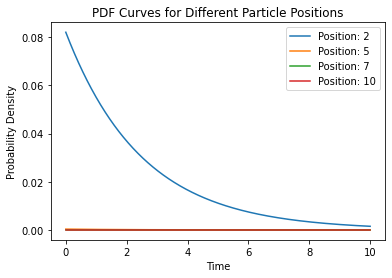

In [108]:
class Particle:
    def __init__(self, decay_constant, position):
        self.decay_constant = decay_constant
        self.position = position

    def pdf_decay(self, time):
        return self.decay_constant * np.exp(-self.decay_constant * time)
    
    def pdf_decay_x(self, time):
        Z = np.exp(-1/self.decay_constant)
        return (1 / Z) * (1 / self.decay_constant) * np.exp(-self.position / self.decay_constant) * self.pdf_decay(time)


fixed_positions = [2, 5, 7, 10]
time = np.linspace(0, 10, 1000)
Particle_1 = Particle(0.4, fixed_positions[0])
Particle_2 = Particle(0.5, fixed_positions[1])
Particle_3 = Particle(0.5, fixed_positions[2])
Particle_4 = Particle(0.5, fixed_positions[3])

Particles = [Particle_1, Particle_2, Particle_3, Particle_4]

for particle in Particles:
    pdf_values = [particle.pdf_decay_x(t) for t in time]
    plt.plot(time, pdf_values, label = f'Position: {particle.position}')

plt.title('PDF Curves for Different Particle Positions')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


In [126]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D


'''--------------------Write your code below this line------------------------------'''
class Particle_D:
    def __init__(self, decay_constant, position):
        self.decay_constant = decay_constant
        self.position = position

    def pdf_decay(self, time):
        return self.decay_constant * np.exp(-self.decay_constant * time)
    
    def pdf_decay_x(self, time):
        Z = np.exp(-1/self.decay_constant)
        return (1 / Z) * (1 / self.decay_constant) * np.exp(-self.position / self.decay_constant) * self.pdf_decay(time)
    
    def Generate_3D_Surface_plot (self, position, decay_constant, save_path):
        X, Y = np.meshgrid(position, decay_constant)
        Z = np.zeros_like(X)
        
        for i in range(len(position)):
            for j in range(len(decay_constant)):
                Z[i, j] = self.pdf_decay_x(X[i, j])
        
        fig = plt.figure(figsize = (10, 8))
        ax = fig.add_subplot(111, projection = '3d')
        ax.plot_surface(X, Y, Z,cmap='viridis')
        
        ax.set_xlabel('Position (x)')
        ax.set_ylabel('Decay Constant (λ)')
        ax.set_zlabel('Probability Density (P(x | λ))')
        ax.set_title('3D Surface Plot of Probability Density')
        
        plt.savefig(save_path, format='png')
        plt.close()

'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

FileNotFoundError: [Errno 2] No such file or directory: 'Example/Path'

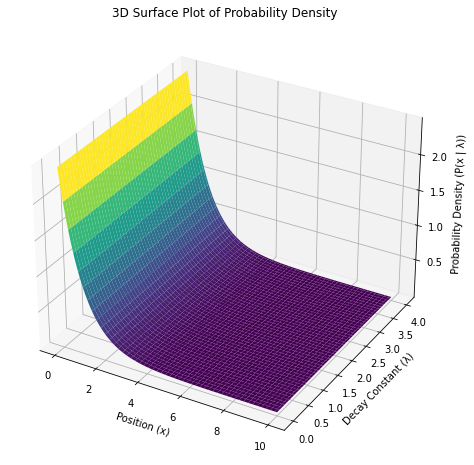

In [127]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''
x_range = np.linspace(0, 10, 100)
lambda_range = np.linspace(0, 4, 100)

save_path = r"Example/Path"

particle = Particle_D(1, 0.1)

particle.Generate_3D_Surface_plot(x_range, lambda_range, save_path)
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




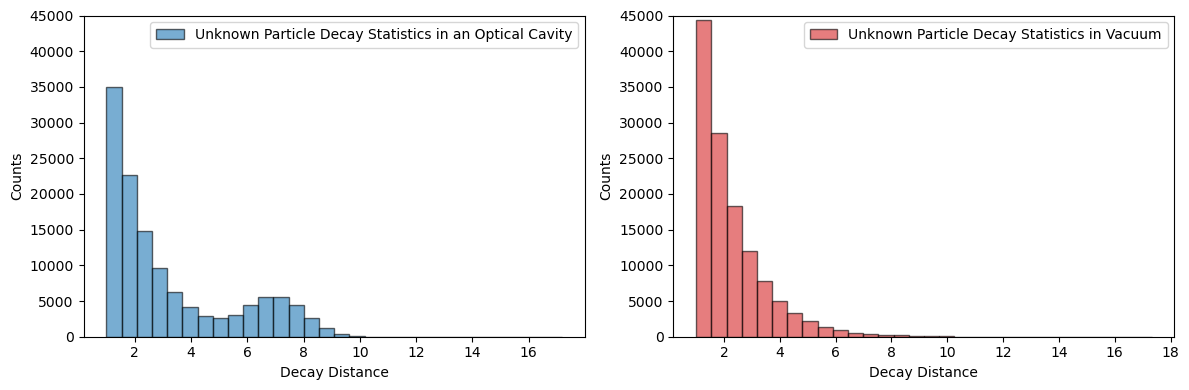

## E)
ou can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

In [63]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''
file_path = "problem_2\Cavity_decay_dataset.json"
file_path_2 = 'problem_2\Vacuum_decay_dataset.json'

with open(file_path, 'r') as json_file:
    cavity = json.load(json_file)
with open(file_path_2, 'r') as json_file:
    vacuum = json.load(json_file)


'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

In [84]:
def decay_function(x, 𝜆, 𝜇, 𝜎, P):
    gaussian = 1 / (𝜎 * np.sqrt(2 * np.pi)) * np.exp(-((x - 𝜇) ** 2) / (2 * 𝜎 ** 2))
    return (1 - P) * np.exp(-𝜆 * x) + P * gaussian


hist_vacuum, bin_edges_vacuum = np.histogram(vacuum, bins=30)  
bin_centers_vacuum = (bin_edges_vacuum[:-1] + bin_edges_vacuum[1:]) / 2

hist_cavity, bin_edges_cavity = np.histogram(cavity, bins=30) 
bin_centers_cavity = (bin_edges_cavity[:-1] + bin_edges_cavity[1:]) / 2


def fit_decay_constants(hist, bin_centers):
    
    initial_guess = (0.1, 1.0, 1.0, 0.1)  

   
    params, covariance = curve_fit(decay_function, bin_centers, hist, p0=initial_guess)

    return params


decay_constants_vacuum = fit_decay_constants(hist_vacuum, bin_centers_vacuum)
decay_constants_cavity = fit_decay_constants(hist_cavity, bin_centers_cavity)

𝜆_vacuum, 𝜇_vacuum, 𝜎_vacuum, P_vacuum = decay_constants_vacuum
𝜆_cavity, 𝜇_cavity, 𝜎_cavity, P_cavity = decay_constants_cavity

print(f"Decay Constants (𝜆) in Vacuum: {𝜆_vacuum}")
print(f"Decay Constants (𝜆) in Cavity: {𝜆_cavity}")
print(f"Parameters 𝜇, 𝜎, and 𝜆 for Cavity: 𝜇={𝜇_cavity}, 𝜎={𝜎_cavity}, 𝜆={𝜆_cavity}")



Decay Constants (𝜆) in Vacuum: 0.8012802661465905
Decay Constants (𝜆) in Cavity: 0.702393056332437
Parameters 𝜇, 𝜎, and 𝜆 for Cavity: 𝜇=7.255267810097346, 𝜎=20183251614.686604, 𝜆=0.702393056332437


C:\Users\yibow\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
'' **write you answer above**''
<br> <br>
<br> $M (t|\lambda) \propto \int \frac{e^{-\frac{1}{\lambda}}}{\lambda}e^{-\frac{x}{\lambda}}e^{tx}dx = \frac{e^{-\frac{1}{\lambda}}}{\lambda}\int e^{x(t-\frac{1}{\lambda})}dx = \frac{e^{-\frac{1}{\lambda}}}{t\lambda -1}e^{x(t-\frac{1}{\lambda})}$<br>

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
'' **write you answer above**''
<br> <br>
<br> $\mu = \frac{\partial}{\partial t} \frac{e^{-\frac{1}{\lambda}}}{t\lambda -1}e^{x(t-\frac{1}{\lambda})}|_{t=0} = -(\lambda + x)e^{-\frac{1}{\lambda}(x+1)}$<br>
<br> $\sigma = M''(0) - [M'(0)]^2 = -(2\lambda^2+ 2x\lambda+x^2)e^{-\frac{1}{\lambda}(1+x)} - (\lambda^2 +2\lambda x+ x^2)e^{-\frac{2}{\lambda}(x+1)}$

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

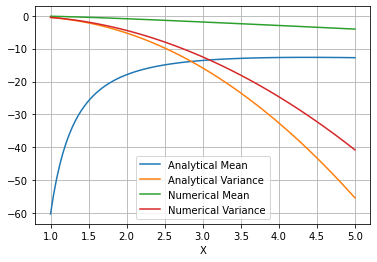

In [184]:
from scipy.misc import derivative

'''--------------------Write your code below this line------------------------------'''
x = 2
lambdas = np.linspace(1, 5, 100)
dt = 0.01

def function (L, t):
        return np.exp(x*(t-(1/L))-(1/L))/(L*t - 1)

def derivative (L, t, dt):
    
    First_value = function(L, t+dt)
    return (First_value - function(L, t))/ dt

def second_derivative (L, t, dt) :
    
    First_value = function(L, t+dt)
    Second_value = function(L, t-dt)
    return (First_value - 2 * function(L, t) + Second_value)/ dt**2

def Var (L, x):
    
    expression = -(2*L**2 + 2*x*L + x**2) * np.exp(-1/L * (1 + x)) - (L**2 + 2*L*x + x**2) * np.exp(-2/L * (x + 1))
    return expression

def mean (L, x):
    return -(L + x)* np.exp(1/L*(x+1)) 

plt.plot(lambdas, mean(lambdas, x), label = 'Analytical Mean')
plt.plot(lambdas, Var(lambdas, x), label = 'Analytical Variance')
plt.plot(lambdas, derivative(lambdas, 0.00001, dt), label = 'Numerical Mean')
plt.plot(lambdas, second_derivative(lambdas, 0.0001, dt), label = 'Numerical Variance')
plt.xlabel('X')
plt.legend()
plt.grid(True)
plt.show()

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
'' **write you answer above**''
<br> <br> 
Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$


$$M_m(t) = \sum_{m=0}^N e^{mt} \frac{N!}{m!(N-m)!}p^{m}(1-p)^{N-m} = \sum_{m=0}^{N}(pe^t)^m\frac{N!}{m!(N-m)!}(1-p)^{N-m} = (1-p+pe^t)^N$$

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
'' **write you answer above**''
<br> <br> 
<br> $$\frac{dM_m(t)}{dt} = N(1-p+pe^t)^{N-1}pe^t = Npe^t(1-p+pe^t)^{N-1}$$<br>
<br> For t = 0, $\frac{dM_m(t)}{dt}|_{t=0} = Np(1+p+p)^{N-1} = Np = E(x)$ <br>
<br> $$\frac{d^2Mx(t)}{dt^2} = npe^t{(n-1)(q + pe^t)^{n-2}pe^t} + (q + pe^t)^{n-1}{npe^t} = npe^t(1-p+pe^t)^{N-2}{(N-1)pe^t+(1-p+pe^t)} = Npe^t(1-p+pe^t)^{N-2}{1-p+Npe^t}$$<br>
At t = 0,
<br> $$E(x^2) = np(1-p+np)$$<br>
Variance is then given by
<br> $$V(x) = E(x^2) - (E(x))^2 = np(1-p+np)-n^2p^2 = np(1-p)$$<br>

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

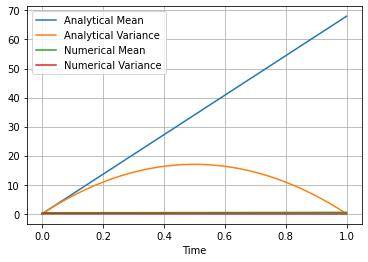

In [54]:


'''--------------------Write your code below this line------------------------------'''
N = 68
p = np.linspace(0, 1, 100)
dt = 0.001
t = 0.005
def binomial_function (t, p):
    return (1 - p + p*np.exp(t))**N

def bino_derivative (t, p):
    First_value = binomial_function(t, p+dt)
    return (First_value - binomial_function(t, p))/ dt

def bino_second_derivative (t, p) :
    
    First_value = binomial_function(t, p+dt)
    Second_value = binomial_function(t, p-dt)
    return (First_value - (2 * binomial_function(t, p)) + Second_value) / dt**2

def bino_mean(p):
    return N*p

def bino_var(p):
    return N *(1-p)*p


plt.plot(p, bino_mean(p), label = 'Analytical Mean')
plt.plot(p, bino_var(p), label = 'Analytical Variance')
plt.plot(p, bino_derivative(t, p), label = 'Numerical Mean')
plt.plot(p, bino_second_derivative(t, p) - (bino_derivative(t, p))**2, label = 'Numerical Variance')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.show()